# The Daubechies D4 Wavelet Tranform

In [98]:
import numpy as np
import cv2
import IPython
from PIL import Image
import matplotlib.pyplot as plt


def split_matrix(matrix): # divide the matrix into 4 quadrants
    leftSide, rightSide = np.split(matrix, 2, axis=1)
    appr, vD = np.split(leftSide, 2, axis=0)
    hD, dD = np.split(rightSide, 2, axis=0)
    
    return (appr), (hD), (vD), (dD)

def imshow(image, width=None):
    _, ret = cv2.imencode('.jpg', image)
    i = IPython.display.Image(data=ret, width=width)
    IPython.display.display(i)

def jpg_to_pgm(jpg_path):
    image = Image.open(jpg_path)
    image_gray = image.convert('L')
    width = image_gray.size[0]
    if (width>512):
        image_gray = image_gray.resize((512, 512))
        pixels = list(image_gray.getdata())

    else: pixels = list(image_gray.getdata())

    return np.array(pixels).reshape((512, 512))

def p_new(matrix):
    max,min  = np.max(matrix), np.min(matrix)
    for i in range(len(matrix)):
        for j in range(len(matrix[i])):
            matrix[i][j] = ((matrix[i][j]-min)*255.0)/(max-min)
    return matrix

In [99]:
def function_daubechies_coeffs(image):
    rows, cols = image.shape
    matrix_coeffs = np.zeros((rows, cols))

    for i in range(rows // 2):
        if i < rows // 2 - 1: 
            matrix_coeffs[i, 2 * i:2 * i + 4] = h_coeffs
        else:
            matrix_coeffs[i, 2 * i:2 * i + 2] = h_coeffs[:2]
            matrix_coeffs[i, 0:2] = h_coeffs[2:]

    for i in range(rows // 2):
        if i < rows // 2 - 1:
            matrix_coeffs[i + rows // 2, 2 * i:2 * i + 4] = g_coeffs
        else:
            matrix_coeffs[i + rows // 2, 2 * i:2 * i + 2] = g_coeffs[:2]
            matrix_coeffs[i + rows // 2, 0:2] = g_coeffs[2:]

    return (np.round(matrix_coeffs, 4))
        

# def inverse_daubechies4_wavelet_transform_2D(daubechies_coeffs, result_V):
#     daubechies_coeffs_transpose = np.transpose(daubechies_coeffs)
#     result_H = np.dot(daubechies_coeffs_transpose, result_V)

#     image = []
#     for row in result_H:
#         original_row = np.dot(daubechies_coeffs_transpose, row)
#         image.append(original_row)

#     return np.array(image)

root2, root3 = np.sqrt(2), np.sqrt(3) 

h_coeffs = np.array([(1 + root3) / (4 * root2),
                     (3 + root3) / (4 * root2),
                     (3 - root3) / (4 * root2),
                     (1 - root3) / (4 * root2)])

g_coeffs = np.array([h_coeffs[3], 
                    -h_coeffs[2],
                     h_coeffs[1], 
                    -h_coeffs[0]])

In [136]:
def daubechies4_wavelet_transform_2D(daubechies_coeffs,image,scale,width, details = None):
    result_H = []

    for row in image: #ESTA PARTE HACE LA HORIZONTAL
        result_H.append(np.dot(daubechies_coeffs,row))
    result_V = np.dot(daubechies_coeffs,result_H)

    if (scale == 1) :
        if details is not None:
            for i in range(len(details)//3):
                sup_img = np.concatenate((result_V,details[0+(i*3)]), axis=1)
                inf_img = np.concatenate((details[1+(i*3)],details[2+(i*3)]), axis=1)
                result_V = np.concatenate((sup_img,inf_img), axis=0)
            return result_V
        else:
            return result_V
        
    elif (np.log2(width//4) >= scale > 1):
        aP,cH,cV,cD = split_matrix(result_V)
        details = ([cH,cV,cD] + details) if details is not None else [cH,cV,cD]
        return daubechies4_wavelet_transform_2D(function_daubechies_coeffs(aP),aP,scale-1,aP.shape[0],details)

    else : print(f"The scale value has to be between 1 - {np.log2(width//4)}")

In [101]:
example = np.random.randint(0.0, 52.0, (8, 8))
example_daubechies_4 = function_daubechies_coeffs(example)
example_daubechies_4_transposed = np.transpose(example_daubechies_4)
print(f"\nCoeffs Matrix:\n {example_daubechies_4}")
print(f"\nCoeffs Matrix Transposed:\n {example_daubechies_4_transposed}")



Coeffs Matrix:
 [[ 0.483   0.8365  0.2241 -0.1294  0.      0.      0.      0.    ]
 [ 0.      0.      0.483   0.8365  0.2241 -0.1294  0.      0.    ]
 [ 0.      0.      0.      0.      0.483   0.8365  0.2241 -0.1294]
 [ 0.2241 -0.1294  0.      0.      0.      0.      0.483   0.8365]
 [-0.1294 -0.2241  0.8365 -0.483   0.      0.      0.      0.    ]
 [ 0.      0.     -0.1294 -0.2241  0.8365 -0.483   0.      0.    ]
 [ 0.      0.      0.      0.     -0.1294 -0.2241  0.8365 -0.483 ]
 [ 0.8365 -0.483   0.      0.      0.      0.     -0.1294 -0.2241]]

Coeffs Matrix Transposed:
 [[ 0.483   0.      0.      0.2241 -0.1294  0.      0.      0.8365]
 [ 0.8365  0.      0.     -0.1294 -0.2241  0.      0.     -0.483 ]
 [ 0.2241  0.483   0.      0.      0.8365 -0.1294  0.      0.    ]
 [-0.1294  0.8365  0.      0.     -0.483  -0.2241  0.      0.    ]
 [ 0.      0.2241  0.483   0.      0.      0.8365 -0.1294  0.    ]
 [ 0.     -0.1294  0.8365  0.      0.     -0.483  -0.2241  0.    ]
 [ 0.      0.   

In [102]:
print(f"Original Matrix:\n {example}\n")
dwt = daubechies4_wavelet_transform_2D(example_daubechies_4,example,1,example.shape[0])
# idwt = inverse_daubechies4_wavelet_transform_2D(example_daubechies_4,dwt)
print(f"\nDirect Daubechies Wavelet Transform:\n {np.round(dwt,4)}")

Original Matrix:
 [[ 8 38  6  9 31  2  3 21]
 [22 26  2 22  7 18 12 42]
 [ 2 50  9 43 19  8 37 39]
 [11 47 15 40 38 11 27 31]
 [40 51 29 49  1 15 16 25]
 [38  6 46 16 47 41 33 23]
 [51  0 18  1 50 51 15 37]
 [30 30 22 22 49 17 50 24]]


Direct Daubechies Wavelet Transform:
 [[ 45.636   27.4046  20.6328  48.6136 -22.1458   2.2549 -16.8133 -17.3469]
 [ 64.6037  67.6684  29.0396  52.4501 -34.3562   7.5883   3.3424 -39.6765]
 [ 57.4596  58.1625  66.5402  55.9067  14.9037  -1.8224  -7.8315  24.2677]
 [ 52.79    39.8834  71.2906  61.4026   1.7772  33.991    4.8379  11.5304]
 [  0.794    6.9496  -3.7114   8.5452  -6.5202  -7.5622  11.4338 -15.2391]
 [ 22.039    8.5016 -27.5765  -8.4716 -17.8298 -26.151   -3.4861   1.5881]
 [-11.3793 -22.4815  16.9881   5.1477   4.6208   0.6705 -29.118   23.2159]
 [  2.4634  -4.9738 -14.1323 -24.2012   0.6881  14.9275  -4.2758 -15.4613]]


## IMAGES EXAMPLES

In [124]:
photo = 'imagen2.jpeg'

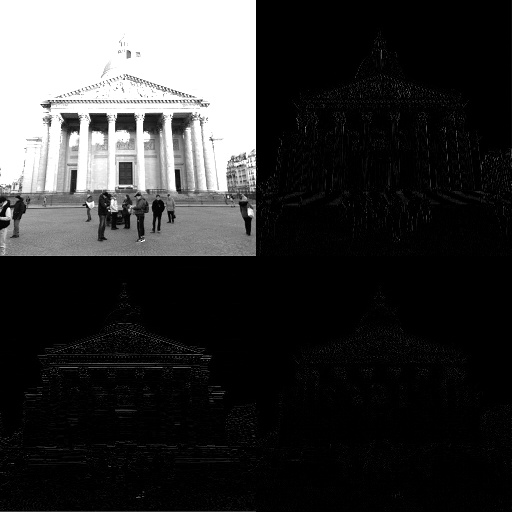

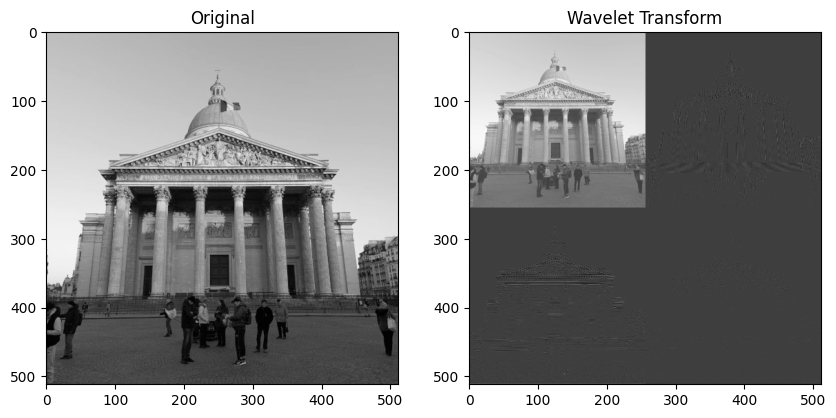

In [141]:
array_photo = jpg_to_pgm(photo)
daubechies_4 = function_daubechies_coeffs(array_photo)
scale, width = 1, array_photo.shape[0]
result_img = daubechies4_wavelet_transform_2D(daubechies_4,array_photo,scale,width)
# reconstructed = daubechies4_wavelet_inverse_transform_2D(daubechies_4,result_img, scale, width)

imshow((result_img))

fig, ax = plt.subplots(1, 2, figsize=(10, 10))
ax[0].imshow(array_photo, cmap='gray')
ax[0].set_title('Original')
ax[1].imshow((result_img), cmap='gray')
ax[1].set_title('Wavelet Transform')
plt.show()


### Hay que cambiar esto

In [ ]:
result_img = daubechies4_wavelet_transform_2D(daubechies_coeffs(aP),aP)

aP1,cH1,cV1,cD1 = split_matrix(result_img)
sup_img = np.concatenate((p_new(aP1),p_new(cH1)), axis=1)
inf_img = np.concatenate((p_new(cV1),p_new(cD1)), axis=1)
result_img = np.concatenate((sup_img,inf_img), axis=0)

sup_img = np.concatenate((result_img,p_new(cH)), axis=1)
inf_img = np.concatenate((p_new(cV),p_new(cD)), axis=1)
result_img = np.concatenate((sup_img,inf_img), axis=0)

fig, ax = plt.subplots(1, 2, figsize=(10, 10))
ax[0].imshow(array_photo, cmap='gray')
ax[0].set_title('Original')
ax[1].imshow((result_img), cmap='gray')
ax[1].set_title('Wavelet Transform')
plt.show()

TypeError: daubechies4_wavelet_transform_2D() missing 2 required positional arguments: 'scale' and 'width'

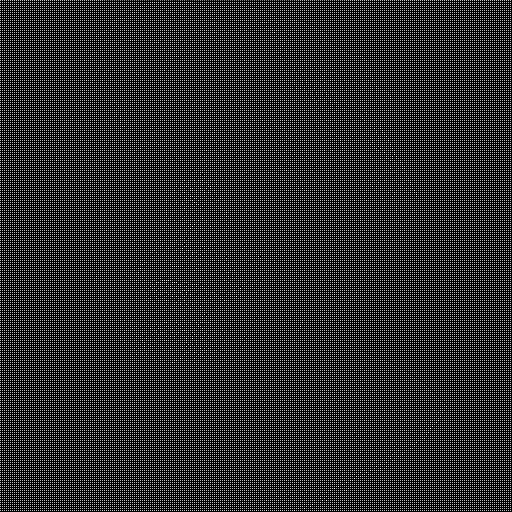

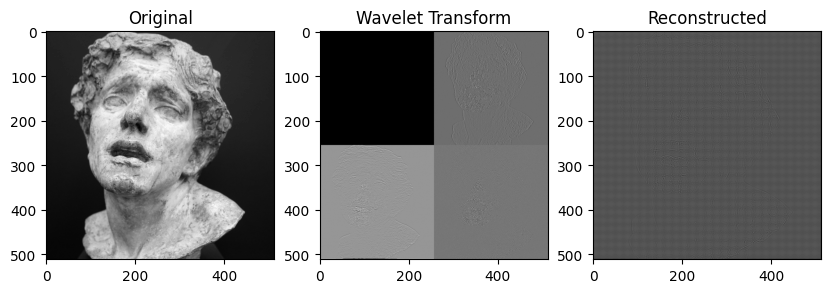

In [ ]:
array_photo = jpg_to_pgm(photo)
daubechies_4 = daubechies_coeffs(array_photo)
result_img = daubechies4_wavelet_transform_2D(daubechies_4,array_photo)
aP,cH,cV,cD = split_matrix(result_img2)
sup_img = np.concatenate((np.zeros_like(aP),cH), axis=1)
inf_img = np.concatenate((cV,cD), axis=1)
result_img = np.concatenate((sup_img,inf_img), axis=0)

reconstructed = inverse_daubechies4_wavelet_transform_2D(daubechies_4,result_img)

# sup_img = np.concatenate((np.zerosike(aP),p_new(cH)), axis=1)
# inf_img = np.concatenate((p_new(cV),p_new(cD)), axis=1)
# result_img = np.concatenate((sup_img,inf_img), axis=0)_l

##########
fig, ax = plt.subplots(1, 3, figsize=(10, 10))
ax[0].imshow(array_photo, cmap='gray')
ax[0].set_title('Original')
ax[1].imshow((result_img), cmap='gray')
ax[1].set_title('Wavelet Transform')
ax[2].imshow((reconstructed), cmap='gray')
ax[2].set_title('Reconstructed')
plt.show()